# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress  


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []


# Empty list for holding the cities names
cities = []


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)


# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 633


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"


# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")


# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city.replace(" ","+")


    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


    # Add 1 to the record count
    record_count += 1


#     # Run an API request for each of the cities
#     try:    
#         # Parse the JSON and retrieve data
#         city_weather = requests.get(city_url).json() 
 
#         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
  
#         city_lat = city_weather["coord"]["lat"] 
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         city_date = city_weather["dt"]

   
# #Append the City information into city_data list
#         city_data.append({
#         "City": city, 
#         "Lat": city_lat, 
#         "Lng": city_lng, 
#         "Max Temp": city_max_temp,
#         "Humidity": city_humidity,
#         "Cloudiness": city_clouds,
#         "Wind Speed": city_wind,
#         "Country": city_country,
#         "Date": city_date})

# # #If an error is experienced, skip the city
#     except:
#       print("City not found. Skipping...")
#       pass
              
# # # Indicate that Data Loading is complete 
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | souillac
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | fallon
Processing Record 6 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | brae
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | ilulissat
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | lang son
Processing Record 14 of Set 1 | smolenka
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | nome
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | mount gambier
Processing Record 19 of Set 1 | eskisehir
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | zelenogradsk
Processing Record 22 of Set 1 | ribeira grande
Pr

In [4]:
city_weather = requests.get(city_url).json() 

NameError: name 'requests' is not defined

In [ ]:

import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(city_weather)


NameError: name 'city_weather' is not defined

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pokrovsk,48.2820,37.1758,283.79,75,75,6.01,UA,1680979022
1,vila velha,-20.3297,-40.2925,304.12,79,40,6.69,BR,1680978897
2,narsaq,60.9167,-46.0500,277.27,78,100,1.39,GL,1680978883
3,beyneu,45.3167,55.2000,287.34,57,45,5.12,KZ,1680979023
4,asau,46.4333,26.4000,277.66,94,78,1.13,RO,1680979023


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")


# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pokrovsk,48.2820,37.1758,283.79,75,75,6.01,UA,1680979022
1,vila velha,-20.3297,-40.2925,304.12,79,40,6.69,BR,1680978897
2,narsaq,60.9167,-46.0500,277.27,78,100,1.39,GL,1680978883
3,beyneu,45.3167,55.2000,287.34,57,45,5.12,KZ,1680979023
4,asau,46.4333,26.4000,277.66,94,78,1.13,RO,1680979023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

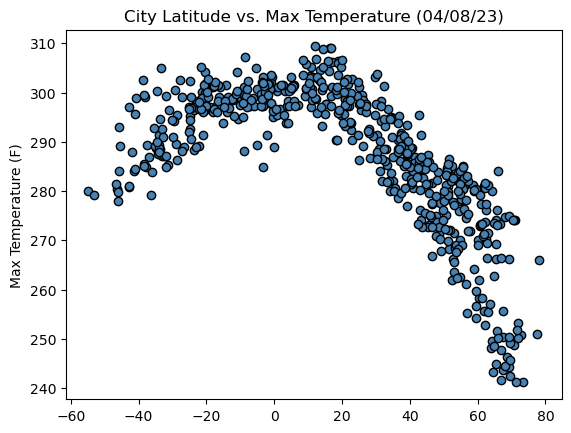

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")

# Save the figure
plt.savefig("output_data/Fig1.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

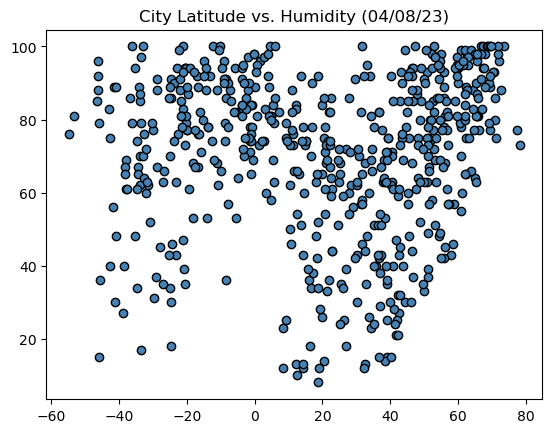

In [ ]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")


# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
    

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

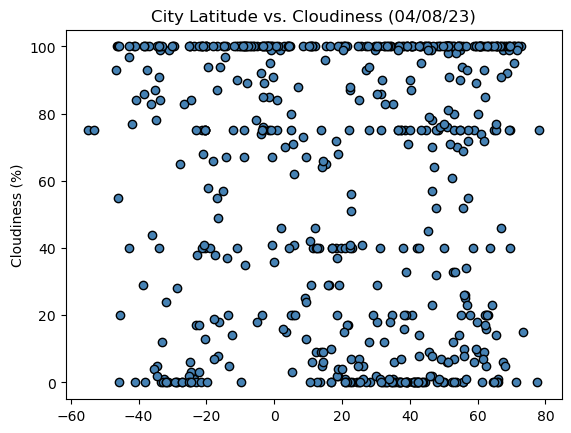

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")
    

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

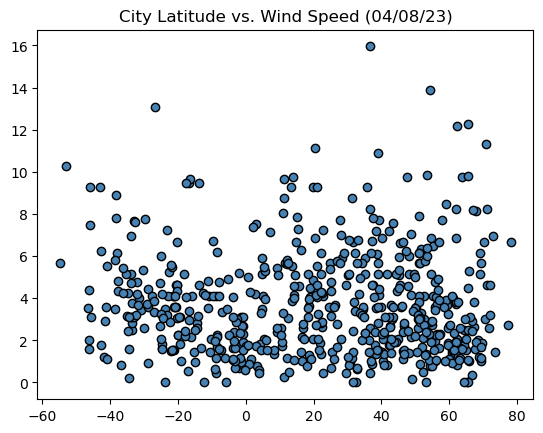

In [ ]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):   

    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    
    # Calculate regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept

    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
        
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {r_value}")
    plt.show()    


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]


# Display sample data
northern_hemi_df.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pokrovsk,48.2820,37.1758,283.79,75,75,6.01,UA,1680979022
2,narsaq,60.9167,-46.0500,277.27,78,100,1.39,GL,1680978883
3,beyneu,45.3167,55.2000,287.34,57,45,5.12,KZ,1680979023
4,asau,46.4333,26.4000,277.66,94,78,1.13,RO,1680979023
5,abu kamal,34.4506,40.9171,295.02,23,100,3.50,SY,1680979023


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


# Display sample data
southern_hemi_df.head()
    

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vila velha,-20.3297,-40.2925,304.12,79,40,6.69,BR,1680978897
6,rikitea,-23.1203,-134.9692,297.79,63,17,7.22,PF,1680978834
8,liwonde,-15.0506,35.2035,293.84,96,57,0.96,MW,1680979024
10,boende,-0.2167,20.8667,295.10,98,100,0.62,CD,1680979025
13,port alfred,-33.5906,26.8910,291.03,97,99,2.47,ZA,1680978844


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
    
    

In [ ]:
# Linear regression on Southern Hemisphere  
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
    

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
y_values = northern_hemi_df["Max Temp"]
x_values = northern_hemi_df["Lat"]  
    


In [ ]:
# Southern Hemisphere
y_values = southern_hemi_df["Max Temp"]
x_values = southern_hemi_df["Lat"]
    


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
y_values = northern_hemi_df["Humidity"]
x_values = northern_hemi_df["Lat"]

In [ ]:
# Southern Hemisphere
y_values = southern_hemi_df["Humidity"]
x_values = southern_hemi_df["Lat"]

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
y_values = northern_hemi_df["Cloudiness"]
x_values = northern_hemi_df["Lat"]

In [ ]:
# Southern Hemisphere
y_values = southern_hemi_df["Cloudiness"]
x_values = southern_hemi_df["Lat"]

**Discussion about the linear relationship:** YOUR RESPONSE HERE